In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import kid_readout.analysis.archive

/usr/lib/pymodules/python2.7/matplotlib/__init__.py:923: UserWarning:  This call to matplotlib.use() has no effect
because the the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  if warn: warnings.warn(_use_error_msg)


In [3]:
pkl = kid_readout.analysis.archive.load_noise_pkl('/data/detectors/pkl/2015-07-04_151209_dark.pkl')

In [4]:
len(pkl)

256

In [5]:
256/32.

8.0

In [6]:
pkl = pkl[-32:]

In [129]:
ffts = []
for snm in pkl:
    ft = np.fft.rfft(snm.fractional_fluctuation_timeseries.real.reshape((-1,2**8)),axis=1)
    ffts.append(ft)

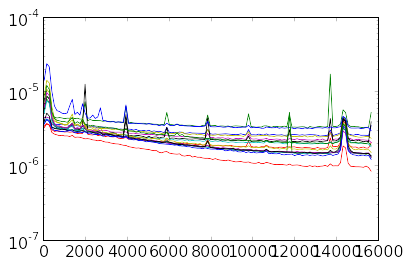

In [229]:
for ft in ffts[1::2]:
    semilogy(freqs,np.abs(ft).mean(0))

In [213]:
ns = len(ffts)
xcs = np.zeros((ns,ns,ffts[0].shape[1]),dtype='complex')
for k in range(ns):
    for m in range(ns):
        xcs[k,m,:] = (ffts[k]*np.conj(ffts[m])).mean(0)/(np.abs(ffts[k]).mean(0)*np.abs(ffts[m]).mean(0))

In [223]:
freqs = np.arange(ffts[0].shape[1])*snm.timeseries_sample_rate/(ffts[0].shape[1]-1)/2.

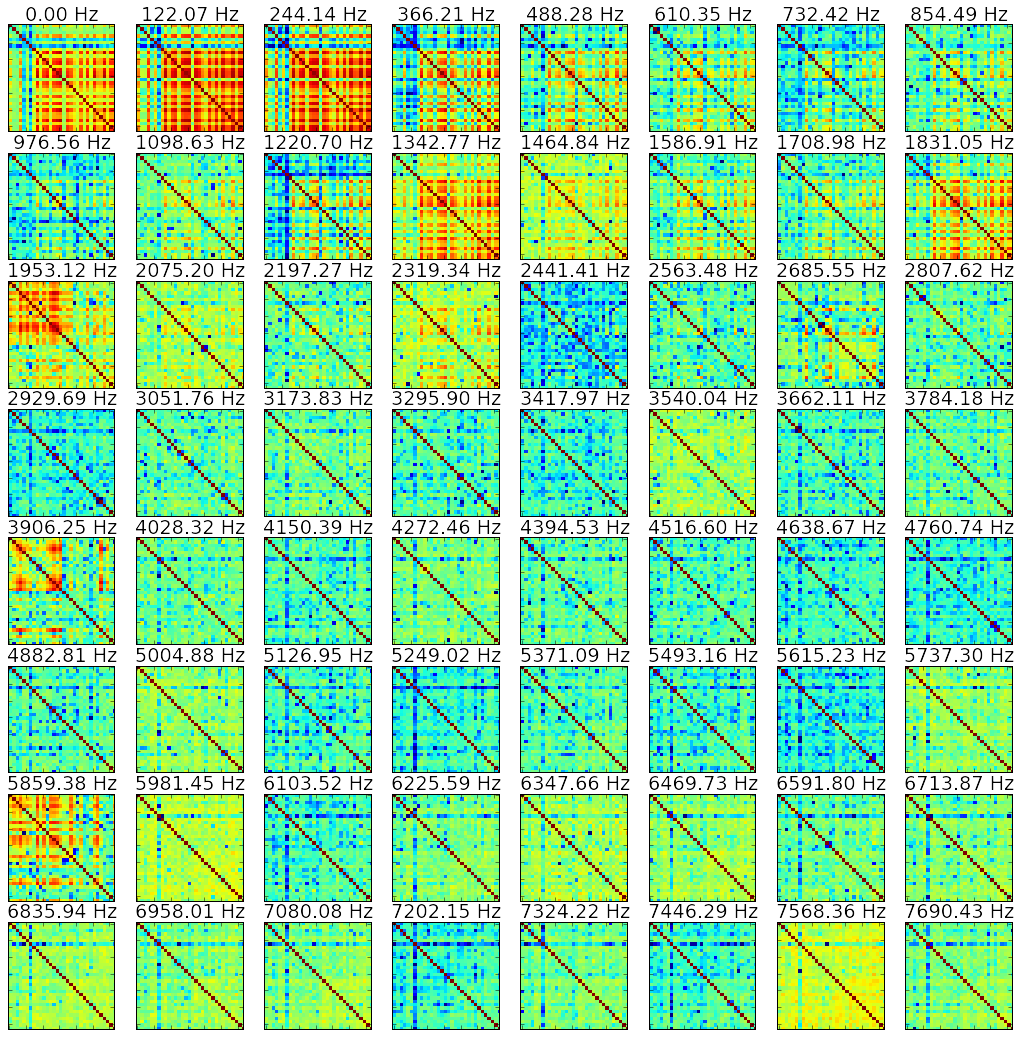

In [227]:
fig,axs = subplots(8,8,figsize=(18,18))
for ch in range(64):
    ax = axs.flatten()[ch]
    ax.imshow(np.log10(np.abs(xcs[:,:,ch])),interpolation='nearest')
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.set_title('%.2f Hz' % freqs[ch])

In [197]:
bin3 = [x[:,2] for x in ffts]

In [198]:
bin3 = np.array(bin3)

In [199]:
xc3 = np.zeros((bin3.shape[0],bin3.shape[0],bin3.shape[1]),dtype='complex')
for k in range(bin3.shape[0]):
    for m in range(bin3.shape[0]):
        xc3[k,m,:] = (bin3[k,:]*np.conj(bin3[m,:]))

In [200]:
xc3m = xc3.mean(2)

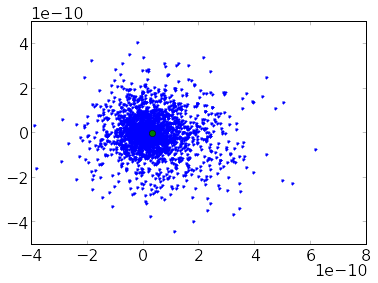

In [211]:
k = 6
m = 10
plot(xc3[k,m,:].real,xc3[k,m,:].imag,'.')
plot(xc3[k,m,:].real.mean(),xc3[k,m,:].imag.mean(),'o')
#plot(xc3[0,2,:].real,xc3[0,2,:].imag,'x')

In [202]:
np.triu?

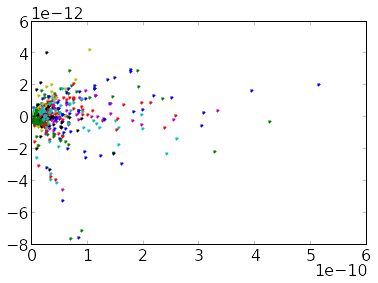

In [203]:
plot(np.triu(xc3m,1).real,np.triu(xc3m,1).imag,'.')

<matplotlib.colorbar.Colorbar instance at 0xf301320>

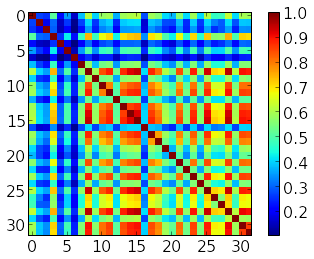

In [204]:
imshow((np.abs(xc3m/np.sqrt(np.outer(np.diag(xc3m),np.diag(xc3m))))),interpolation='nearest')
colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7fe5e2207cf8>

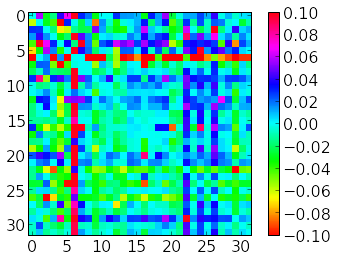

In [210]:
imshow(np.angle(xc3m),interpolation='nearest',cmap=cm.hsv)
clim(-0.1,.1)
colorbar()

In [195]:
np.diag(np.abs(xc3m/(np.eye(32)*np.diag(xc3m))))

ValueError: operands could not be broadcast together with shapes (32,32) (16,) 

In [56]:
np.diag(np.abs(xc3m/(np.eye(32)*np.diag(xc3m))))

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.])

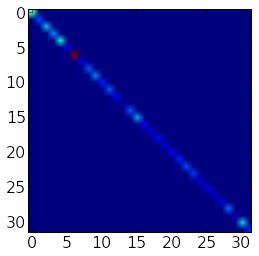

In [54]:
imshow(np.abs(np.eye((32))*np.diag(xc3m)))

<matplotlib.colorbar.Colorbar instance at 0x7fe5fdb2ad40>

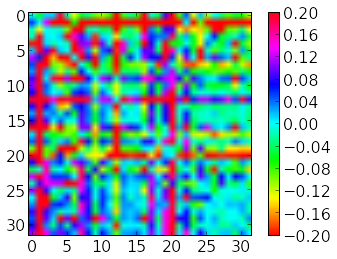

In [116]:
imshow(np.angle(xc3m),cmap=cm.hsv)
clim(-0.2,.2)
colorbar()

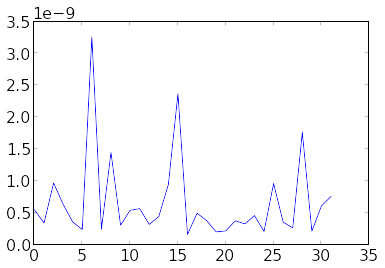

In [97]:
plot(np.diag(xc3.mean(2)).real)

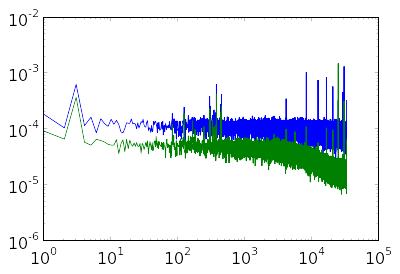

In [27]:
loglog(np.abs(ffts[2]).mean(0))
loglog(np.abs(ffts[20]).mean(0))

In [62]:
import kid_readout.utils.filters

In [63]:
kid_readout.utils.filters.low_pass_fir?

In [81]:
lpfd = [kid_readout.utils.filters.low_pass_fir(snm.fractional_fluctuation_timeseries,num_taps=1024,cutoff=1/16.,decimate_by=16) for snm in pkl]

In [82]:
xcd = np.zeros((32,32),dtype='complex')
for k in range(32):
    for m in range(32):
        xcd[k,m] = (lpfd[k]*np.conj(lpfd[m])).mean()

In [74]:
xcd.shape

(32, 32)

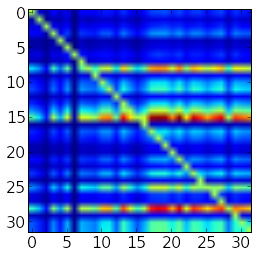

In [85]:
imshow(np.abs(xcd/np.diag(xcd)))

In [231]:
import kid_readout.utils.despike

In [230]:
snm